In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
dftr=pd.read_csv(R"C:\Users\ny691\Downloads\Classification\Classification\train_u6lujuX_CVtuZ9i (1).csv")

In [8]:
dftr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Feature selection

In [9]:
dftr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
dftr.drop("Loan_ID",axis=1,inplace=True)

In [11]:
dftr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
dftr.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
dftr["Gender"]=dftr["Gender"].fillna(dftr["Gender"].mode()[0])

In [14]:
dftr["Gender"].isna().sum()

0

In [15]:
dftr["Gender"].dtype

dtype('O')

In [16]:
dftr["Gender"].mode()[0]

'Male'

In [17]:
dftr["Dependents"].dtype

dtype('O')

In [18]:
dftr["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [19]:
dftr["Dependents"].replace("[^0-9]","",regex=True,inplace=True)

In [20]:
dftr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
dftr["Dependents"].dtypes

dtype('O')

In [22]:
dftr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
ilist=dftr.columns[:-1]

In [24]:
for i in ilist:
    print(dftr[i])
    if dftr[i].dtype=="object":
        dftr[i].fillna(dftr[i].mode()[0],inplace=True)
    else:
        dftr[i].fillna(dftr[i].mean(),inplace=True)
    print(dftr[i].isna().sum())

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object
0
0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object
0
0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object
0
0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object
0
0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object
0
0      5849
1      4583
2      3000
3      2583
4      

In [25]:
dftr.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
dftr.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
dftr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [28]:
dftr["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [29]:
dftr["Dependents"]=dftr["Dependents"].astype("int")

## Error detection

<AxesSubplot:>

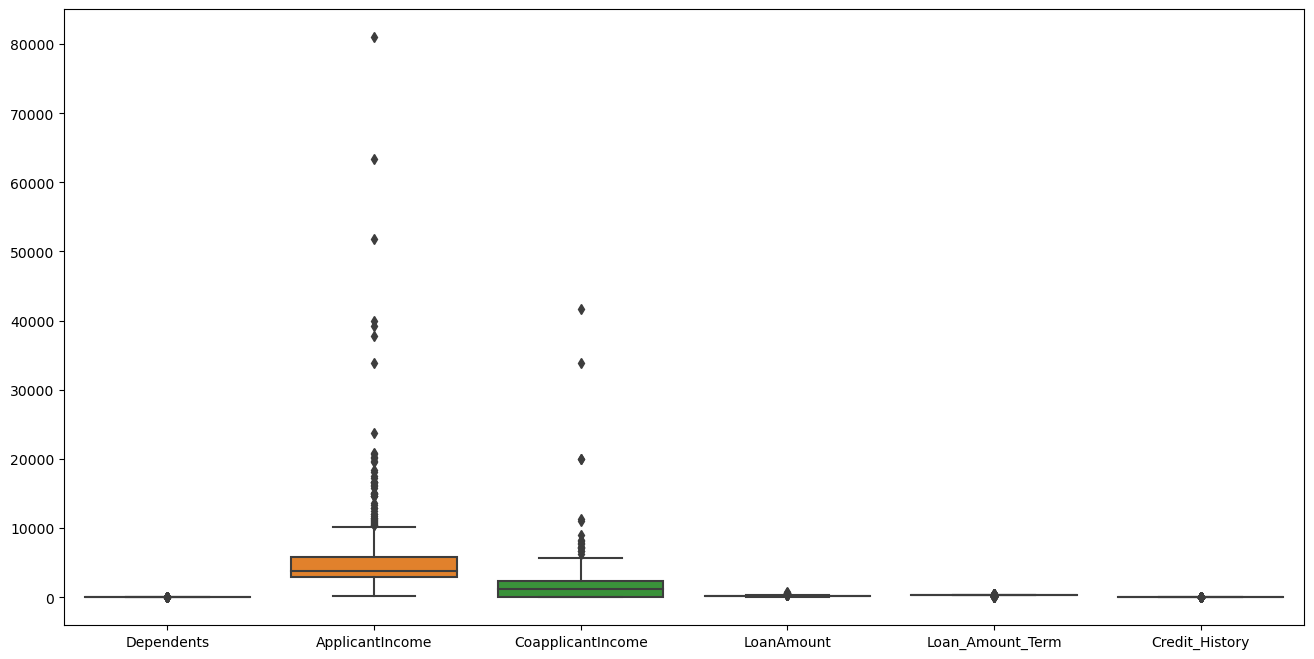

In [30]:
plt.figure(figsize=(16,8))
sns.boxplot(data=dftr)

In [31]:
ilist1=['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

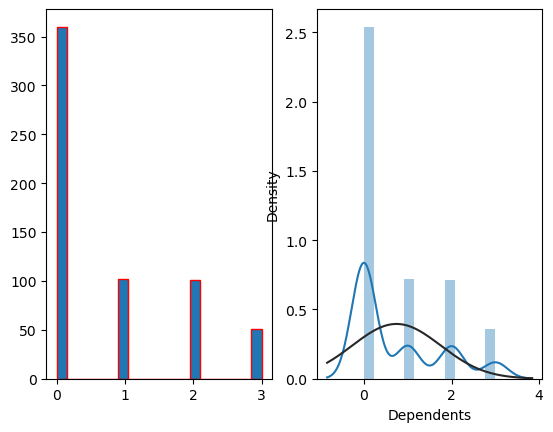

1.0
It is a skew Distribution => IQR method
lower limit : -1.5
upper limit : 2.5
Revalidation Errors
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


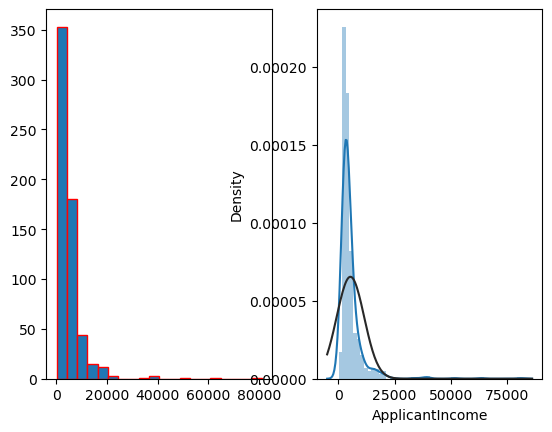

7.0
It is a skew Distribution => IQR method
lower limit : -1498.75
upper limit : 10171.25
Revalidation Errors
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


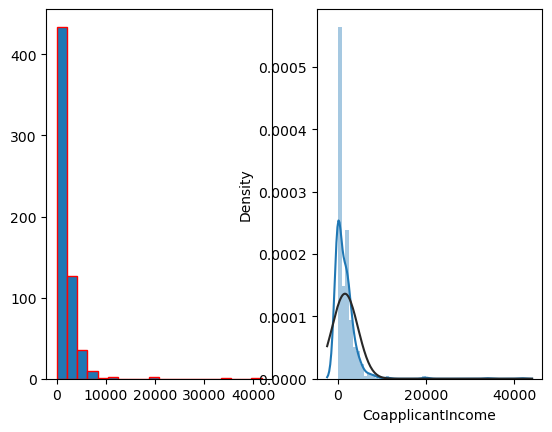

7.0
It is a skew Distribution => IQR method
lower limit : -3445.875
upper limit : 5743.125
Revalidation Errors
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


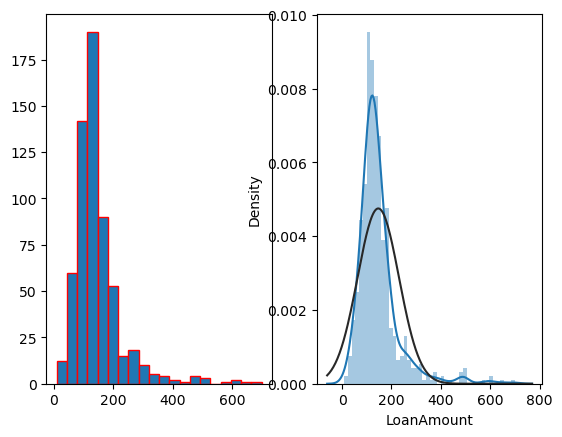

3.0
It is a skew Distribution => IQR method
lower limit : 3.5
upper limit : 261.5
Revalidation Errors
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


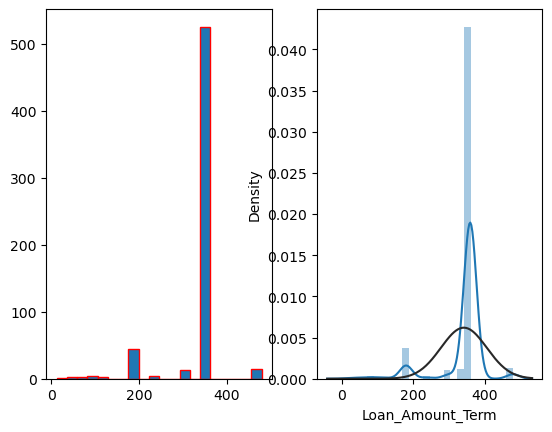

-2.0
It is a skew Distribution => IQR method
lower limit : 360.0
upper limit : 360.0
Revalidation Errors
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


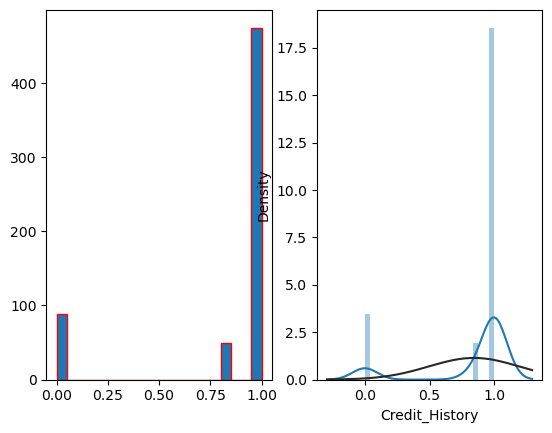

-2.0
It is a skew Distribution => IQR method
lower limit : 1.0
upper limit : 1.0
Revalidation Errors
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


In [32]:
from scipy.stats import norm
for i in ilist1:
    plt.subplot(1,2,1)
    plt.hist(dftr[i],ec="r",bins=20)
    plt.subplot(1,2,2)
    sns.distplot(dftr[i],fit=norm)
    plt.show()
    print(dftr[i].skew().round())
    if dftr[i].skew().round()==0:
        print("IT is a Normal distribution => Mean std method")
        print(dftr[i].describe())
        m=dftr[i].mean()
        s=dftr[i].std()
        lower=m-(3*s)
        upper=m+(3*s)
        print("lower limit :",lower)
        print("upper limit :",upper)
        dftr[i]=dftr[i].map(lambda A: m if A<lower else m if A>upper else A)
        print("Revalidation Errors")
        print(dftr[(dftr[i]<lower) | (dftr[i]>upper)])
    else:
        print("It is a skew Distribution => IQR method")
        q1=dftr[i].quantile(0.25)
        q3=dftr[i].quantile(0.75)
        IQR=q3-q1
        lower1=q1-(1.5*IQR)
        upper1=q3+(1.5*IQR)
        print("lower limit :",lower1)
        print("upper limit :",upper1)
        dftr[i]=dftr[i].map(lambda S :lower1 if S<lower1 else upper1 if S>upper1 else S)
        print("Revalidation Errors")
        print(dftr[(dftr[i]<lower1) | (dftr[i]>upper1)])
    

### Encoding 

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
lab=LabelEncoder()

In [35]:
lab.fit(dftr["Loan_Status"])

LabelEncoder()

In [36]:
dftr["Loan_Status"]=lab.transform(dftr["Loan_Status"])

In [37]:
dftr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,2.5,Graduate,No,4106.0,0.0,40.000000,360.0,1.0,Rural,1
611,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2.0,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,1


In [38]:
pd.get_dummies(dftr,drop_first=True)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849.0,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,1
1,1.0,4583.0,1508.0,128.000000,360.0,1.0,0,1,1,0,0,0,0
2,0.0,3000.0,0.0,66.000000,360.0,1.0,1,1,1,0,1,0,1
3,0.0,2583.0,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1
4,0.0,6000.0,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900.0,0.0,71.000000,360.0,1.0,1,0,0,0,0,0,0
610,2.5,4106.0,0.0,40.000000,360.0,1.0,1,1,1,0,0,0,0
611,1.0,8072.0,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,1
612,2.0,7583.0,0.0,187.000000,360.0,1.0,1,1,1,0,0,0,1


In [39]:
dftr=pd.get_dummies(dftr,drop_first=True)

In [40]:
dftr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849.0,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,1
1,1.0,4583.0,1508.0,128.000000,360.0,1.0,0,1,1,0,0,0,0
2,0.0,3000.0,0.0,66.000000,360.0,1.0,1,1,1,0,1,0,1
3,0.0,2583.0,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1
4,0.0,6000.0,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900.0,0.0,71.000000,360.0,1.0,1,0,0,0,0,0,0
610,2.5,4106.0,0.0,40.000000,360.0,1.0,1,1,1,0,0,0,0
611,1.0,8072.0,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,1
612,2.0,7583.0,0.0,187.000000,360.0,1.0,1,1,1,0,0,0,1


### Data Separetion

In [41]:
x=dftr.drop("Loan_Status",axis=1)

In [42]:
x.shape

(614, 12)

In [43]:
y=dftr["Loan_Status"]

In [44]:
y.shape

(614,)

### Imbalance

In [45]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

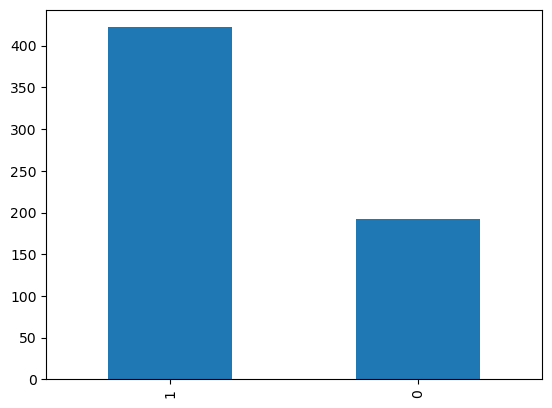

In [46]:
y.value_counts().plot(kind="bar")

### Spliting data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)

In [49]:
x_train.shape,x_test.shape

((491, 12), (123, 12))

In [50]:
y_train.shape,y_test.shape

((491,), (123,))

In [51]:
from sklearn.svm import SVC

In [52]:
svc=SVC()

In [53]:
svc.fit(x_train,y_train)

SVC()

In [54]:
svc.score(x_test,y_test)

0.6747967479674797

In [55]:
for n in range(51):
    svc1=SVC()
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.05,random_state=n)
    print(n)
    svc1.fit(xtrain,ytrain)
    s=svc1.score(xtest,ytest)
    print(s)
    #print(svc1.score(xtrain,ytrain))
    print(svc1,"==",s)
    print("******************")
    

0
0.6774193548387096
SVC() == 0.6774193548387096
******************
1
0.7741935483870968
SVC() == 0.7741935483870968
******************
2
0.7096774193548387
SVC() == 0.7096774193548387
******************
3
0.8709677419354839
SVC() == 0.8709677419354839
******************
4
0.6451612903225806
SVC() == 0.6451612903225806
******************
5
0.7741935483870968
SVC() == 0.7741935483870968
******************
6
0.8064516129032258
SVC() == 0.8064516129032258
******************
7
0.7096774193548387
SVC() == 0.7096774193548387
******************
8
0.7741935483870968
SVC() == 0.7741935483870968
******************
9
0.7419354838709677
SVC() == 0.7419354838709677
******************
10
0.7741935483870968
SVC() == 0.7741935483870968
******************
11
0.5806451612903226
SVC() == 0.5806451612903226
******************
12
0.6774193548387096
SVC() == 0.6774193548387096
******************
13
0.7419354838709677
SVC() == 0.7419354838709677
******************
14
0.5483870967741935
SVC() == 0.54838709677